# K mean clustering:
- It is unsupervised ML algorithm
- So we will only have input and feature (No target(lable)). [ X --> MxN ]

- First we will select random K endpoint from data.
- We will find euclidean distance from centroid to all the data point.
- Assign cluster to each data based on minimum distance.
- Calculate new centroid and repeat the same steps....
- Follow this process untill it converge (Do not make any change for centroid)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
np.random.seed(42)
X = np.random.rand(300,2)

In [11]:
X

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

In [12]:
a,b = X.shape
X[np.random.choice(a, 5)]

array([[0.60111501, 0.70807258],
       [0.92469362, 0.87733935],
       [0.47417383, 0.09783416],
       [0.03438852, 0.9093204 ],
       [0.37454012, 0.95071431]])

In [13]:
for i,a in enumerate(X):
    print(i,a)
    break

0 [0.37454012 0.95071431]


## Actual Function to solve it

In [14]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def K_mean_clustering(X, k, iteration=100):
    
    n_examples, n_features = X.shape

    centroieds = X[np.random.choice(n_examples, k)]
    clusters = np.zeros(n_examples)

    # print(centroieds)
    # print(clusters)
    # print("="*20)
    
    for z in range(iteration):
        for i,x in enumerate(X):
            # calcualte the distance between centroid and each data point and save custer number to respective data point
            distances = [euclidean_distance(x, centroied) for centroied in centroieds]
            # print(distances)
            clusters[i] = np.argmin(distances)
        
        # print("+"*10)
        # print(clusters)
        # print("+"*10)
        # print(clusters == 0)
        
        # Now calculate new centroid...
        new_centroied = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
        # print(new_centroied)

        if np.all(new_centroied == centroieds):
            print(z)
            break

        centroieds = new_centroied
    
    return clusters, centroieds

In [15]:
K = 3
clusters, centroids = K_mean_clustering(X, K)

22


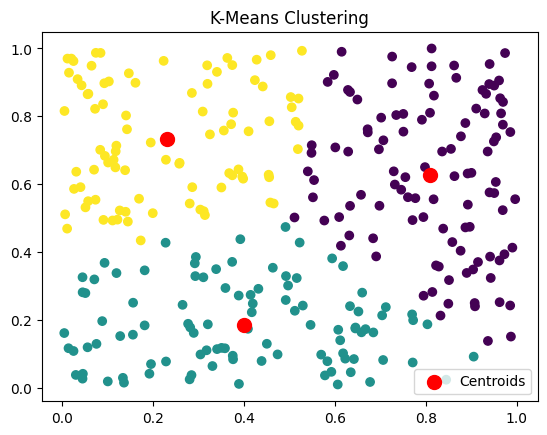

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

## Playground

In [36]:
v1 = np.random.rand(10,1)
v2 = np.random.rand(10,1)

In [37]:
np.sqrt(np.sum((v1-v2)**2))
# np.sqrt(np.sum((a - b) ** 2))

1.2147857217648679

In [38]:
euclidean_distance(v1,v2)

1.2147857217648679

# Using sklearn

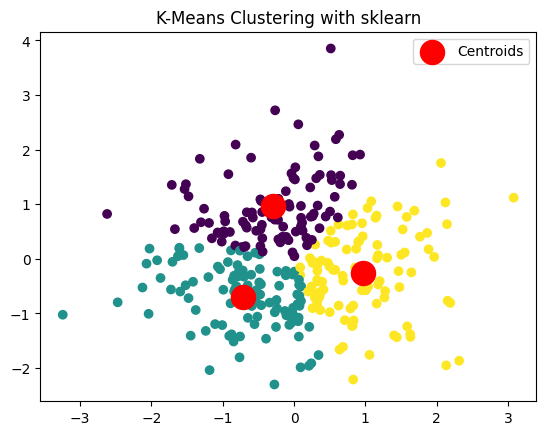

In [17]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(300, 2)

# Apply K-Means clustering
K = 3
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X)

# Get the cluster labels and centroids
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.title("K-Means Clustering with sklearn")
plt.legend()
plt.show()


# Common Questions with Answers

# Common Interview Questions on K-Means

### 1. What is K-Means Clustering?
K-Means is an unsupervised clustering algorithm that partitions the data into K clusters by iteratively assigning data points to the closest centroid and updating the centroid until convergence.

### 2. How do you select the value of K in K-Means?
The value of K can be selected using methods like the **Elbow Method** or **Silhouette Score**. The Elbow Method looks for the point where increasing K gives diminishing returns in reducing the SSE.

### 3. What is the role of centroids in K-Means?
Centroids represent the center of a cluster. In each iteration, data points are assigned to the nearest centroid, and centroids are updated as the mean of the data points assigned to them.

### 4. What is the time complexity of K-Means?
The time complexity is **O(n * K * I * d)**, where:
- n is the number of data points.
- K is the number of clusters.
- I is the number of iterations.
- d is the number of dimensions.

### 5. What are some limitations of K-Means?
- It is sensitive to the initial placement of centroids.
- K-Means can converge to a local minimum, which depends on the initial centroids.
- It requires the number of clusters (K) to be pre-specified.
- Sensitive to outliers.

### 6. What is K-Means++? How does it differ from K-Means?
**K-Means++** is an initialization technique for K-Means that improves the selection of initial centroids by spreading them out, reducing the chances of poor clustering performance.

### 7. What happens if K is too small or too large?
- If **K is too small**, clusters will contain points that are not similar, leading to high variance within clusters.
- If **K is too large**, clusters will be too specific, leading to overfitting and more centroids than necessary.

### 8. How does K-Means handle outliers?
K-Means is sensitive to outliers because the mean can be shifted by outliers, affecting the centroids' positions. Variants like **K-Medoids** use medians instead of means, making them more robust to outliers.

### 9. Can K-Means be used for non-spherical clusters?
No, K-Means performs poorly with non-spherical or non-convex clusters. Algorithms like **DBSCAN** or **Agglomerative Clustering** are better suited for such data.

### 10. How does K-Means clustering differ from hierarchical clustering?
K-Means requires the number of clusters K to be specified upfront and is computationally faster for large datasets. Hierarchical clustering builds a dendrogram without needing to specify K initially, but it’s slower and less efficient on large datasets.

### 11. What is inertia in K-Means clustering?
Inertia is the sum of squared distances between data points and their respective cluster centroid. Lower inertia indicates better clustering performance but must be balanced against the complexity of adding more clusters.
